In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/제로베이스/제로베이스 머신러닝 프로젝트/csv 폴더 모음/크롤링 데이터 240118/musinsa_240119.csv', index_col=0)
df.tail()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy
5810,아우터,레더/라이더스 재킷,레이서 비건레더 윈드 자켓,C23SC13,1,0,1,1.0,"('40세~', 0)",1800.0,1565,71500.0,35,5.0,4.9,38,150.0
5811,아우터,롱패딩/롱헤비 아우터,컨템포러리 헤비 다운 파카 블랙,5004357130,0,0,0,NaN,"('~18세', 0)",1800.0,107,245000.0,0,5.0,5.0,3,NaN
5812,아우터,숏패딩/숏헤비 아우터,프리미엄 다운 숏푸퍼-화이트,OG403-4,0,0,1,NaN,"('~18세', 0)",2200.0,409,55000.0,69,5.0,4.5,11,NaN
5813,아우터,후드 집업,[Champion x Hello Sunrise][ASIA] Reverse Weave...,CKTS3FC72G2,1,0,2,NaN,"('~18세', 0)",1200.0,193,189000.0,0,6.0,NaN,0,NaN
5814,아우터,카디건,WOOL COLLAR ZIP UP KNIT CARDIGAN _ CHARCOAL,FZW2022FWKN013,1,0,0,0.0,"('29~33세', 0)",1700.0,503,64000.0,50,5.0,4.9,39,50.0


In [ ]:
df.isnull().sum()

major_category        0
middle_category       0
name                  0
number                0
limit                 0
exclusive             0
target_gender         0
buy_gender         1490
buy_age               0
view                 83
like                  0
price                 0
discount_rate         0
delivery_date         4
rating              572
review                0
buy                1552
dtype: int64



---



## 상의-스포츠/용품 위치 바꾸기

In [ ]:
df.loc[df.middle_category == '상의', 'major_category'] = '상의'

In [ ]:
df.loc[df.middle_category == '상의','middle_category'] = '스포츠/용품'

## 중복행 제거

In [ ]:
df = df.drop_duplicates(keep='first', ignore_index=True)
df.tail()

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy
5637,아우터,레더/라이더스 재킷,레이서 비건레더 윈드 자켓,C23SC13,1,0,1,1.0,"('40세~', 0)",1800.0,1565,71500.0,35,5.0,4.9,38,150.0
5638,아우터,롱패딩/롱헤비 아우터,컨템포러리 헤비 다운 파카 블랙,5004357130,0,0,0,NaN,"('~18세', 0)",1800.0,107,245000.0,0,5.0,5.0,3,NaN
5639,아우터,숏패딩/숏헤비 아우터,프리미엄 다운 숏푸퍼-화이트,OG403-4,0,0,1,NaN,"('~18세', 0)",2200.0,409,55000.0,69,5.0,4.5,11,NaN
5640,아우터,후드 집업,[Champion x Hello Sunrise][ASIA] Reverse Weave...,CKTS3FC72G2,1,0,2,NaN,"('~18세', 0)",1200.0,193,189000.0,0,6.0,NaN,0,NaN
5641,아우터,카디건,WOOL COLLAR ZIP UP KNIT CARDIGAN _ CHARCOAL,FZW2022FWKN013,1,0,0,0.0,"('29~33세', 0)",1700.0,503,64000.0,50,5.0,4.9,39,50.0


In [ ]:
df.isnull().sum()

major_category        0
middle_category       0
name                  0
number                0
limit                 0
exclusive             0
target_gender         0
buy_gender         1440
buy_age               0
view                 81
like                  0
price                 0
discount_rate         0
delivery_date         4
rating              556
review                0
buy                1498
dtype: int64

## Null값 처리

### buy의 Null값 처리
- 평점이 0, 리뷰수가 0이 조회수가 200 이하인 상품은 buy가 NaN이어도 유지함
- 정말 안 팔려서 NaN으로 수집된 아이템으로 고려
- 그 외 NaN값은 drop

-> 처리 결과 20개 정도만 남음

In [ ]:
bool1 = df.rating.isnull()
bool2 = df.review == 0
bool3 = df.view < 200
bool4 = df.buy.isnull()
df.loc[(bool1 & bool2)&  bool3 &bool4, 'buy'] = 0

In [ ]:
df.dropna(subset=['buy'], inplace=True)

<ipython-input-15-39373fed9d9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['buy'], inplace=True)


In [ ]:
df.isnull().sum()

major_category      0
middle_category     0
name                0
number              0
limit               0
exclusive           0
target_gender       0
buy_gender         27
buy_age             0
view                0
like                0
price               0
discount_rate       0
delivery_date       2
rating             49
review              0
buy                 0
dtype: int64

### buy_gender Null값 처리
- target_gender값과 동일하게 입력

In [ ]:
df.loc[df['buy_gender'].isnull() == True, 'buy_gender'] = df.loc[df['buy_gender'].isnull() == True, 'target_gender']

### 나머지 결측값 처리를 위해 데이터 통계량 확인

In [ ]:
df.describe()

,limit,exclusive,target_gender,buy_gender,view,like,price,discount_rate,delivery_date,rating,review,buy
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4.171000e+03,4171.000000,4169.000000,4122.000000,4171.000000,4171.000000
mean,0.250060,0.050348,0.751139,0.398705,6303.740110,4344.811796,8.653919e+04,28.989691,5.535860,4.801359,691.211460,1348.945097
std,0.433099,0.218687,0.822012,0.491646,19056.512898,12802.166918,9.342566e+04,21.860560,2.815542,0.188567,3900.777125,6673.745948
min,0.000000,0.000000,0.000000,0.000000,100.000000,8.000000,0.000000e+00,0.000000,3.000000,2.800000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1400.000000,402.000000,3.850000e+04,10.000000,5.000000,4.800000,16.000000,50.000000
50%,0.000000,0.000000,1.000000,0.000000,2300.000000,1017.000000,5.900000e+04,29.000000,5.000000,4.800000,46.000000,100.000000
75%,0.500000,0.000000,1.000000,1.000000,4300.000000,2742.500000,1.032000e+05,43.000000,6.000000,4.900000,193.000000,500.000000
max,1.000000,1.000000,2.000000,2.000000,560000.000000,243639.000000,2.450000e+06,90.000000,60.000000,5.000000,107179.000000,189000.000000


### delivery_date Null값 처리
- max값을 보아 이상치가 있는 것을 확인, 중앙값인 5일로 입력

In [ ]:
df.loc[df['delivery_date'].isnull() == True, 'delivery_date'] = 5.0

### rating의 Null값 처리

In [ ]:
notzerobuy_df = df.loc[(df['buy'] != 0) & (df['rating'].isnull())]
notzerobuy_df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy
395,상의,맨투맨/스웨트셔츠,CROP SWEAT BOLERO WHITE MELANGE,CA22DCD001WM,0,0,1,1.0,"('19~23세', 0)",1200.0,2773,42500.0,35,21.0,NaN,115,350.0
396,상의,니트/스웨터,Pakrat Wool Knit Pullover Oatmeal,MDKNDC001OT,1,0,0,1.0,"('19~23세', 0)",2000.0,397,63200.0,20,5.0,NaN,0,50.0
470,상의,맨투맨/스웨트셔츠,[세트] 돌핀 자수 엣지 기모 스웻셔츠 조거 트레이닝 팬츠 블랙,134322722BK,0,0,0,1.0,"('40세~', 0)",1400.0,117,79900.0,53,5.0,NaN,0,50.0
565,상의,후드 티셔츠,HOME PAINTING PRINTED HOODIE (WHITE),11698,0,0,2,1.0,"('24~28세', 0)",3900.0,616,132300.0,10,7.0,NaN,0,50.0
566,상의,맨투맨/스웨트셔츠,UNISEX DUNST LOGO CREASE SWEATSHIRT FRENCH NAV...,UDTS4A103N2,0,0,1,1.0,"('24~28세', 0)",950.0,1683,65550.0,5,7.0,NaN,110,300.0
592,상의,스포츠/용품,헤비 웨이트 스웻 후드 2컬러,03,0,0,0,0.0,"('24~28세', 0)",8000.0,362,39800.0,31,19.0,NaN,64,250.0
614,상의,긴소매 티셔츠,울U넥 티,78,0,0,1,1.0,"('29~33세', 0)",150.0,89,48000.0,0,5.0,NaN,0,50.0
1121,상의,후드 티셔츠,[패키지]로럴골든 후드티_12COLOR,GA008PK,0,0,0,1.0,"('~18세', 0)",1300.0,113,79800.0,42,5.0,NaN,0,50.0
1207,상의,맨투맨/스웨트셔츠,UNISEX CUPID CAMPUS SWEATSHIRT FRENCH NAVY_M_U...,UDTS4A102N2_M,0,0,0,0.0,"('24~28세', 0)",1800.0,859,65550.0,5,7.0,NaN,119,250.0
1252,상의,니트/스웨터,울 라운드 니트 - 차콜,WT23FW-K-23,0,0,0,0.0,"('24~28세', 0)",1200.0,115,40300.0,35,6.0,NaN,0,50.0


In [ ]:
notzerobuy_df.isnull().sum()

major_category      0
middle_category     0
name                0
number              0
limit               0
exclusive           0
target_gender       0
buy_gender          0
buy_age             0
view                0
like                0
price               0
discount_rate       0
delivery_date       0
rating             22
review              0
buy                 0
dtype: int64

### rating의 Null값 처리
  - buy값이 0이 아니면서 rating이 0인 22개 -> 4.8
  - buy값이 0이면서 rating이 0인 27개 -> 0

In [ ]:
df.loc[df['rating'].isnull() == True, 'rating'] = 0.0

for i in notzerobuy_df.index:
  df.loc[i, 'rating'] = 4.8

### view의 Null값 처리
- RandomForestRegressor 모델을 이용한 예측값 사용
- 여러가지 파라미터 조정 결과
  - Best r2_Score: 0.47624328080184863
  - Best trial parameter {'n_estimators': 281, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8499303073699949}

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import r2_score

# # DataFrame에서 'view'가 결측치인 행을 제외한 데이터로 모델을 학습시키기 위해 두 개의 서브셋을 생성
# train_data = df.dropna(subset=['view'])
# predict_data = df[df['view'].isnull()]

# # 특성과 타겟을 정의
# features = ['like', 'price', 'discount_rate', 'rating', 'review', 'buy']
# target = 'view'

# # 학습 데이터셋과 타겟을 설정
# X = train_data[features]
# y = train_data[target]

# #train, test 데이터셋 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# params = {'n_estimators': 281, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8499303073699949}
# model = RandomForestRegressor(**params)

# # 학습 데이터셋을 이용하여 모델을 학습
# model.fit(X_train, y_train)

# # 예측 데이터셋을 이용하여 'view'의 결측치를 예측
# predicted_views = model.predict(X_test)

# r2_score(y_test, predicted_views)

In [ ]:
# pred = model.predict(df.loc[df.view.isnull(), ['like', 'price', 'discount_rate', 'rating', 'review', 'buy']])
# df.loc[df['view'].isnull(), 'view'] = pred

In [ ]:
df.isnull().sum()

major_category     0
middle_category    0
name               0
number             0
limit              0
exclusive          0
target_gender      0
buy_gender         0
buy_age            0
view               0
like               0
price              0
discount_rate      0
delivery_date      0
rating             0
review             0
buy                0
dtype: int64

## buy_age 변경
- 동률인 경우가 있기 때문에 buy_age1, buy_age2로 컬럼을 나눔
- 범위를 0,1,2,3,4,5,6으로 구분지어주었음

In [ ]:
df.buy_age.unique()
# 1. ~18
# 2. 19~23
# 3. 24~28
# 5. 29~33
# 6. 34~39
# 7. 40~

array(["('40세~', 0)", "('24~28세', 0)", "('19~23세', 0)", "('~18세', 0)",
       "('29~33세', 0)", '(0, 0)', "('19~23세', '24~28세')",
       "('19~23세', '29~33세')", "('19~23세', '40세~')", "('~18세', '19~23세')",
       "('34~39세', 0)", "('29~33세', '34~39세')", "('24~28세', '29~33세')",
       "('~18세', '29~33세')", "('29~33세', '40세~')", "('24~28세', '40세~')",
       "('~18세', '24~28세')", "('34~39세', '40세~')", "('~18세', '40세~')",
       "('24~28세', '34~39세')", "('19~23세', '34~39세')"], dtype=object)

In [ ]:
import re
numbers = [int(num) for num in re.findall(r'\d+', df.iloc[0, 8])]
numbers

[40, 0]

In [ ]:
def age1(row):
  numbers = [int(num) for num in re.findall(r'\d+', row)]
  return numbers[0]

In [ ]:
df['buy_age1'] = df['buy_age'].apply(age1)

In [ ]:
def age2(row):
  numbers = [int(num) for num in re.findall(r'\d+', row)]
  return numbers[1]

In [ ]:
df['buy_age2'] = df['buy_age'].apply(age2)

In [ ]:
df.buy_age1.unique()

array([40, 24, 19, 18, 29,  0, 34])

In [ ]:
def age_range(row):
  if row == 40:
    return 6
  elif row == 18:
    return 1
  elif row == 19:
    return 2
  elif row == 24:
    return 3
  elif row == 29:
    return 4
  elif row == 34:
    return 5
  else: return 0

In [ ]:
df['buy_age1'] = df['buy_age1'].apply(age_range)
df['buy_age2'] = df['buy_age2'].apply(age_range)

In [ ]:
df

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,buy_age1,buy_age2
0,상의,맨투맨/스웨트셔츠,1992 오버핏 스웨트셔츠 화이트멜란지,5005601539,0,0,0,0.0,"('40세~', 0)",64000.0,1240,36900.0,50,6.0,4.9,37,2300.0,6,0
1,상의,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,1,0,2,0.0,"('40세~', 0)",72000.0,67396,34820.0,30,6.0,4.8,4342,34000.0,6,0
3,상의,맨투맨/스웨트셔츠,SMALL CENTER 맨투맨 (STMSTD-0015),5004508673,0,0,2,0.0,"('24~28세', 0)",149000.0,9572,29900.0,50,5.0,4.8,900,11000.0,3,0
4,상의,니트/스웨터,오버핏 하찌 니트 - 8 COLOR [ONE OR TWO],JT62,0,0,2,0.0,"('19~23세', 0)",148000.0,18887,24800.0,81,6.0,4.8,2133,14000.0,2,0
5,상의,맨투맨/스웨트셔츠,센서티브 오버 기모 맨투맨 (기모 안감) (5 Colors),U2FWT07,0,0,2,0.0,"('24~28세', 0)",6300.0,673,26500.0,50,5.0,5.0,56,550.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5634,아우터,나일론/코치 재킷,[SET] 2WAY 플랩 포켓 윈드브레이커_블랙 셋업,1993studio,0,0,0,1.0,"('24~28세', 0)",2400.0,210,124600.0,30,5.0,4.9,12,50.0,3,0
5635,아우터,후드 집업,EMPTY SLIM FIT HOODIE ZIP-UP GRAY,23SPOUT05GRY,1,0,1,1.0,"('19~23세', 0)",1000.0,1128,108000.0,0,5.0,4.7,31,50.0,2,0
5636,아우터,베스트,[US] Cozy High 플리스 조끼 (NORMAL GREEN) CKJA2F401E2,CKJA2F401E2,0,0,0,0.0,"('19~23세', 0)",10000.0,716,79500.0,50,6.0,4.6,38,100.0,2,0
5637,아우터,레더/라이더스 재킷,레이서 비건레더 윈드 자켓,C23SC13,1,0,1,1.0,"('40세~', 0)",1800.0,1565,71500.0,35,5.0,4.9,38,150.0,6,0


In [ ]:
df.reset_index(drop=True)

,major_category,middle_category,name,number,limit,exclusive,target_gender,buy_gender,buy_age,view,like,price,discount_rate,delivery_date,rating,review,buy,buy_age1,buy_age2
0,상의,맨투맨/스웨트셔츠,1992 오버핏 스웨트셔츠 화이트멜란지,5005601539,0,0,0,0.0,"('40세~', 0)",64000.0,1240,36900.0,50,6.0,4.9,37,2300.0,6,0
1,상의,후드 티셔츠,컬러 배색 1992 그래픽 후드 (NAVY),TRSHT04NV,1,0,2,0.0,"('40세~', 0)",72000.0,67396,34820.0,30,6.0,4.8,4342,34000.0,6,0
2,상의,맨투맨/스웨트셔츠,SMALL CENTER 맨투맨 (STMSTD-0015),5004508673,0,0,2,0.0,"('24~28세', 0)",149000.0,9572,29900.0,50,5.0,4.8,900,11000.0,3,0
3,상의,니트/스웨터,오버핏 하찌 니트 - 8 COLOR [ONE OR TWO],JT62,0,0,2,0.0,"('19~23세', 0)",148000.0,18887,24800.0,81,6.0,4.8,2133,14000.0,2,0
4,상의,맨투맨/스웨트셔츠,센서티브 오버 기모 맨투맨 (기모 안감) (5 Colors),U2FWT07,0,0,2,0.0,"('24~28세', 0)",6300.0,673,26500.0,50,5.0,5.0,56,550.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,아우터,나일론/코치 재킷,[SET] 2WAY 플랩 포켓 윈드브레이커_블랙 셋업,1993studio,0,0,0,1.0,"('24~28세', 0)",2400.0,210,124600.0,30,5.0,4.9,12,50.0,3,0
4167,아우터,후드 집업,EMPTY SLIM FIT HOODIE ZIP-UP GRAY,23SPOUT05GRY,1,0,1,1.0,"('19~23세', 0)",1000.0,1128,108000.0,0,5.0,4.7,31,50.0,2,0
4168,아우터,베스트,[US] Cozy High 플리스 조끼 (NORMAL GREEN) CKJA2F401E2,CKJA2F401E2,0,0,0,0.0,"('19~23세', 0)",10000.0,716,79500.0,50,6.0,4.6,38,100.0,2,0
4169,아우터,레더/라이더스 재킷,레이서 비건레더 윈드 자켓,C23SC13,1,0,1,1.0,"('40세~', 0)",1800.0,1565,71500.0,35,5.0,4.9,38,150.0,6,0


In [ ]:
import copy
# 결측치 처리 완료 df 백업
backup = df.copy()

In [ ]:
df = backup.copy()

---

## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
from matplotlib import font_manager, rc
import numpy as np

path = 'c:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unlown system...sorry..')

Unlown system...sorry..


## 데이터 분포도 확인

In [ ]:
df_corr = df[['limit', 'exclusive', 'target_gender', 'view',
              'like', 'price', 'discount_rate',
              'delivery_date', 'rating', 'review', 'buy']]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=df_corr['view'], name='view'))
fig.add_trace(go.Box(y=df_corr['like'], name='like'))
fig.add_trace(go.Box(y=df_corr['discount_rate'], name='discount_rate'))
fig.add_trace(go.Box(y=df_corr['delivery_date'], name='delivery_date'))
fig.add_trace(go.Box(y=df_corr['rating'], name='rating'))
fig.add_trace(go.Box(y=df_corr['review'], name='review'))
fig.add_trace(go.Box(y=df_corr['buy'], name='buy'))

fig.show()

- 데이터가 편중되어 있지만 로그 변환과 같은 전처리가 필요해 보인다

## 상관관계 분석

In [ ]:
df_corr.corr()

,limit,exclusive,target_gender,view,like,price,discount_rate,delivery_date,rating,review,buy
limit,1.000000,-0.132958,0.098724,0.095723,0.133601,-0.007280,-0.023866,0.029184,0.049395,0.062477,0.060255
exclusive,-0.132958,1.000000,-0.034337,0.005473,0.021124,-0.071911,-0.010977,-0.035636,0.023153,0.064445,0.051680
target_gender,0.098724,-0.034337,1.000000,0.138895,0.145097,-0.101187,0.028029,0.061764,-0.015298,0.048919,0.082835
view,0.095723,0.005473,0.138895,1.000000,0.602962,-0.052058,0.038428,0.069985,0.029813,0.451626,0.566803
like,0.133601,0.021124,0.145097,0.602962,1.000000,-0.099910,-0.032594,0.050820,0.029810,0.847551,0.769775
price,-0.007280,-0.071911,-0.101187,-0.052058,-0.099910,1.000000,-0.288258,-0.026106,-0.047253,-0.071994,-0.089020
discount_rate,-0.023866,-0.010977,0.028029,0.038428,-0.032594,-0.288258,1.000000,-0.043577,-0.068529,-0.021023,-0.016255
delivery_date,0.029184,-0.035636,0.061764,0.069985,0.050820,-0.026106,-0.043577,1.000000,-0.002245,0.006103,0.030841
rating,0.049395,0.023153,-0.015298,0.029813,0.029810,-0.047253,-0.068529,-0.002245,1.000000,0.017167,0.026079
review,0.062477,0.064445,0.048919,0.451626,0.847551,-0.071994,-0.021023,0.006103,0.017167,1.000000,0.778071


In [ ]:
df.describe()

,limit,exclusive,target_gender,buy_gender,view,like,price,discount_rate,delivery_date,rating,review,buy,buy_age1,buy_age2
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4.171000e+03,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,0.250060,0.050348,0.751139,0.398705,6303.740110,4344.811796,8.653919e+04,28.989691,5.535603,4.770271,691.211460,1348.945097,3.186047,0.006234
std,0.433099,0.218687,0.822012,0.491646,19056.512898,12802.166918,9.342566e+04,21.860560,2.814891,0.428296,3900.777125,6673.745948,1.395576,0.146778
min,0.000000,0.000000,0.000000,0.000000,100.000000,8.000000,0.000000e+00,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1400.000000,402.000000,3.850000e+04,10.000000,5.000000,4.700000,16.000000,50.000000,2.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,2300.000000,1017.000000,5.900000e+04,29.000000,5.000000,4.800000,46.000000,100.000000,3.000000,0.000000
75%,0.500000,0.000000,1.000000,1.000000,4300.000000,2742.500000,1.032000e+05,43.000000,6.000000,4.900000,193.000000,500.000000,4.000000,0.000000
max,1.000000,1.000000,2.000000,2.000000,560000.000000,243639.000000,2.450000e+06,90.000000,60.000000,5.000000,107179.000000,189000.000000,6.000000,6.000000


min값과 max값의 차이가 큰 값들이 많고 편차가 클 거 같다

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\seaborn\utils.py:80: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



<Axes: >

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\user\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



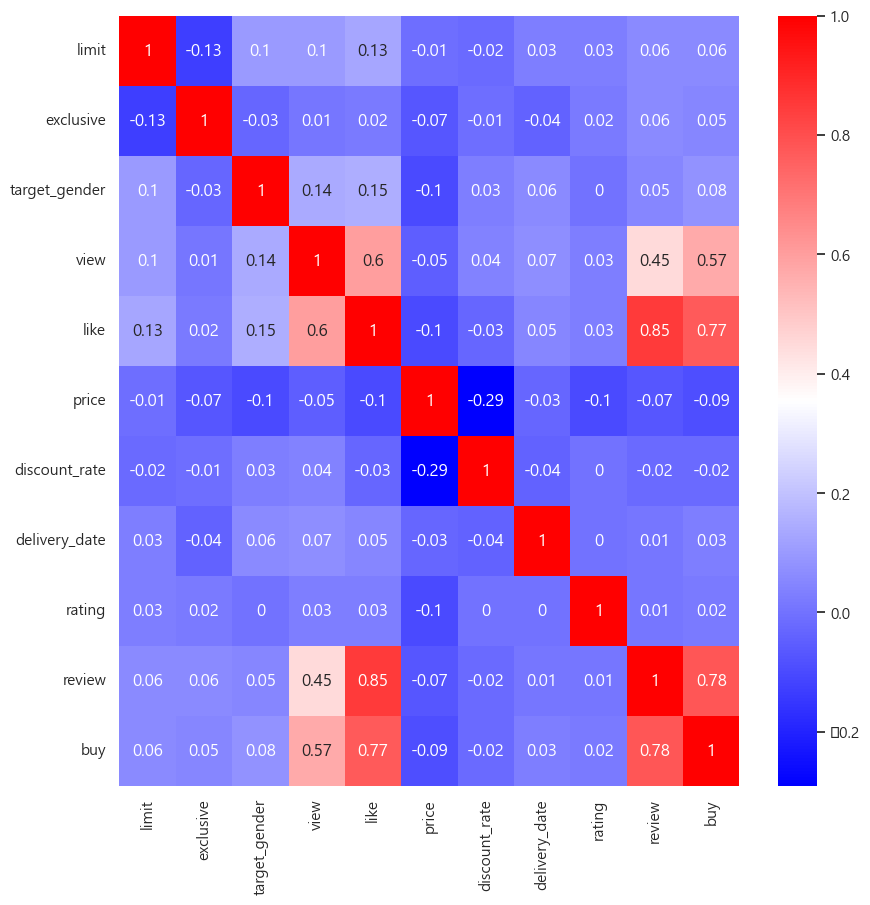

In [ ]:
plt.figure(figsize=(10, 10))
correlation_matrix = df_corr.corr(numeric_only=True).round(2)
sns.heatmap(data = correlation_matrix, annot=True, cmap='bwr')

- 예측하고자 한 누적 매출량과 관계성이 있는 항목은 조회수, 좋아요, 후기가 가장 높은 관계성을 가진다

## 한정판매 여부별 1년간 누적판매량

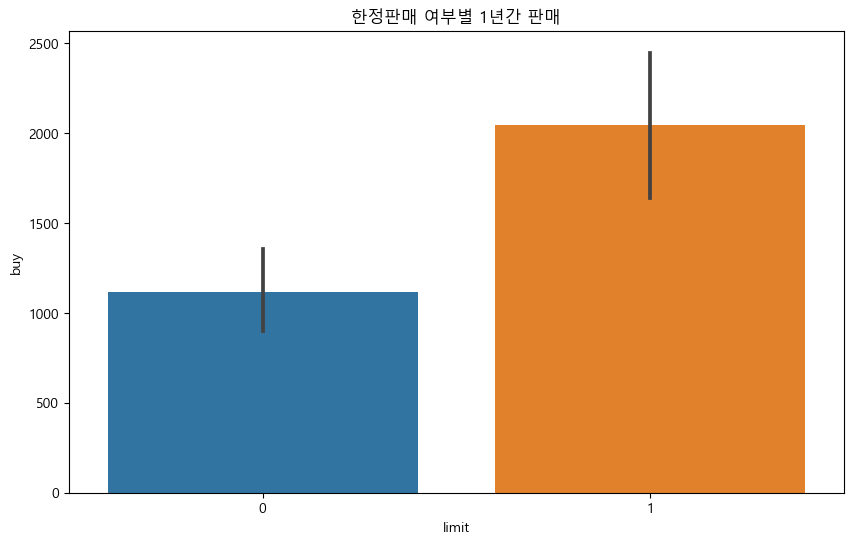

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="limit", y="buy", data=df)
plt.title("한정판매 여부별 1년간 판매")
plt.show()

# 한정판매 X = 0
# 무신사 한정판매 O = 1

- 한정판매가 아닌 경우보다 한정판매인 경우가 누적판매량의 평균이 2배가 차이가 난다

## 단독판매별 1년간 누적판매량

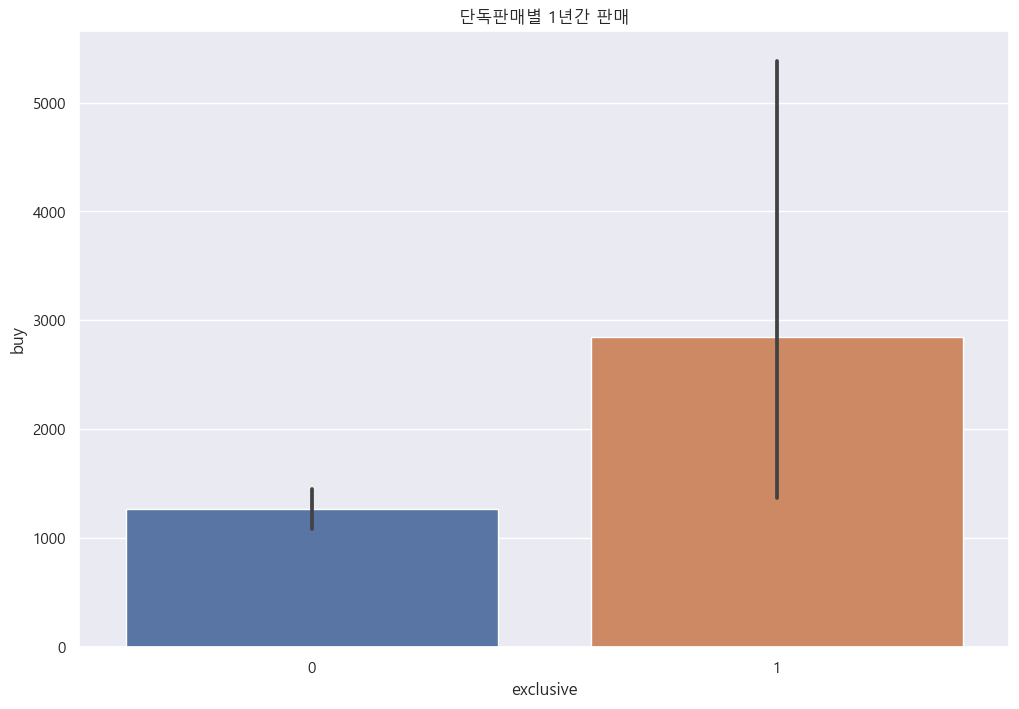

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="exclusive", y="buy", data=df)
plt.title("단독판매별 1년간 판매")
plt.show()
# 무신사 단독판매 = 1
# 아니면 = 0

- 단독판매가 아닌 경우보다 단독판매인 경우가 누적판매량의 평균이 2배가 차이가 난다

## 타겟 성별별 1년간 판매

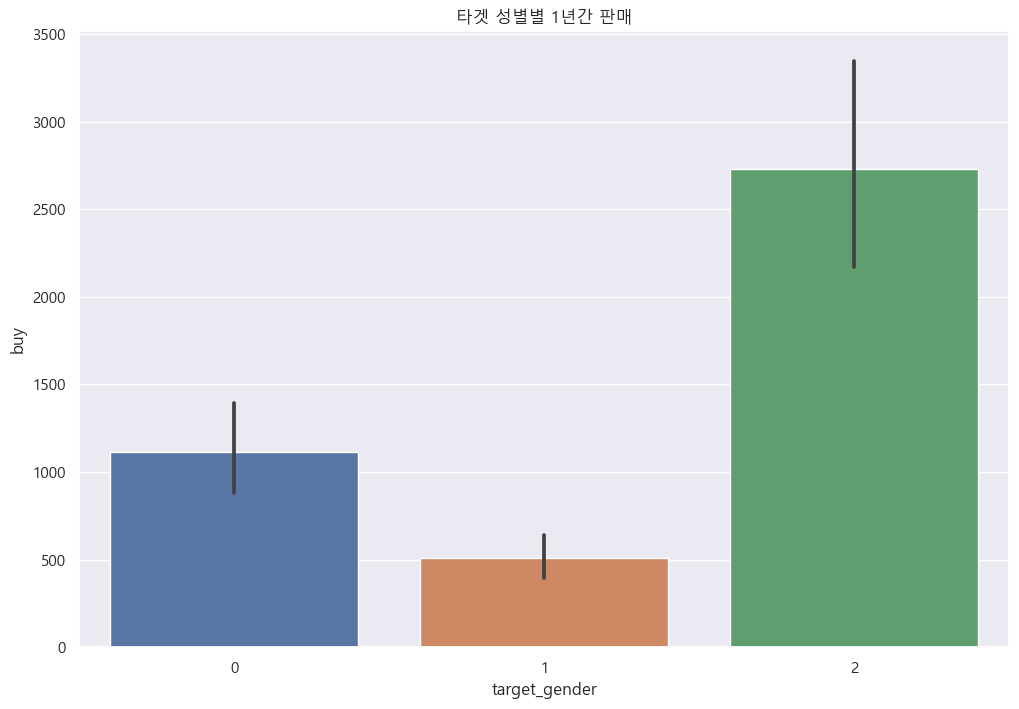

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="target_gender", y="buy", data=df)
plt.title("타겟 성별별 1년간 판매")
plt.show()
# 남자 = 0
# 여자 = 1
# 남/여 = 2

- 타겟 성별별 누적매출량은 남녀공용 제품이 가장 높고 여성 제품이 가장 낮다

## 조회수에 따른 1년간 판매량 현황

In [ ]:
# import matplotlib as mpl

# plt.rc('font', size = 13)
# figure, ax = plt.subplots()
# figure.set_size_inches(11, 5)


# # 조회수에 따른 1년간 판매량 현황 막대그래프
# sns.barplot(x = 'view', y = 'buy', data = df)

# # 그래프 제목, x축 라벨, y축 라벨명 설정
# ax.set(title = '조회수에 따른 1년간 판매량 현황',
#        xlabel = '조회수',
#        ylabel = '1년간 막대그래프');

# plt.xticks(fontsize=5)
# plt.show();

## 평점별 1년간 판매량 현황 막대그래프

In [ ]:
selected_rows = df[df['like'] <= 120000]
selected_rows_view = selected_rows[selected_rows['view'] <= 150000]


In [ ]:
df['rating'].unique()

array([4.8])

In [ ]:
import sys

# 모듈이 있는 디렉토리 경로
module_path = '/content/drive/MyDrive/제로베이스/koreanize_matplotlib'

# sys.path에 경로 추가
sys.path.append(module_path)

# 모듈 import
import koreanize_matplotlib

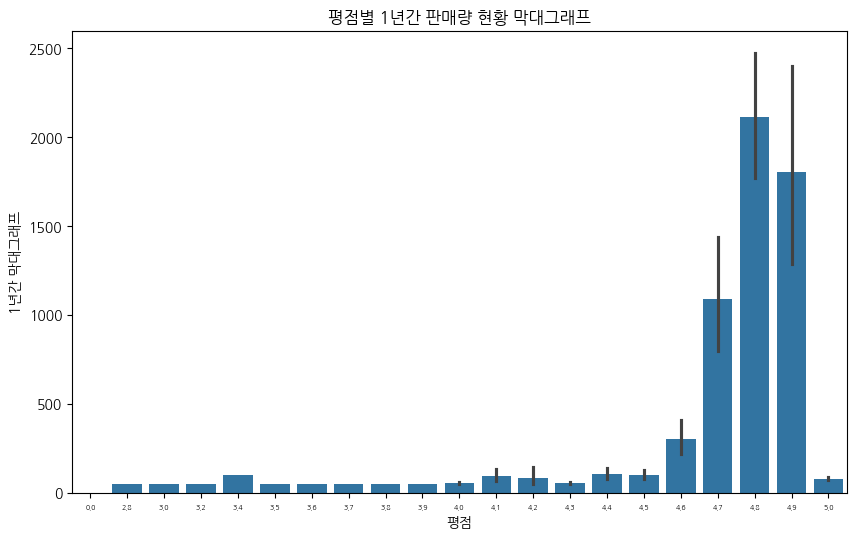

In [ ]:
# 평점별 1년간 판매량 현황 막대그래프
plt.figure(figsize=(10,6))
sns.barplot(x = 'rating', y = 'buy', data = df)
# sns.pointplot(x='rating', y='buy', data=selected_rows_view, join=False, markers='o')


# 그래프 제목, x축 라벨, y축 라벨명 설정
plt.title('평점별 1년간 판매량 현황 막대그래프')
plt.xlabel('평점')
plt.ylabel('1년간 막대그래프')

plt.xticks(fontsize=5)
plt.show();

다양한 평점을 받을 수록 5점이 아닐 확률이 높고
평점이 높은 제품일 수록 판매량이 높다(평점-판매량 상관관계가 높음)

## 카테고리 변수들의 분포 확인

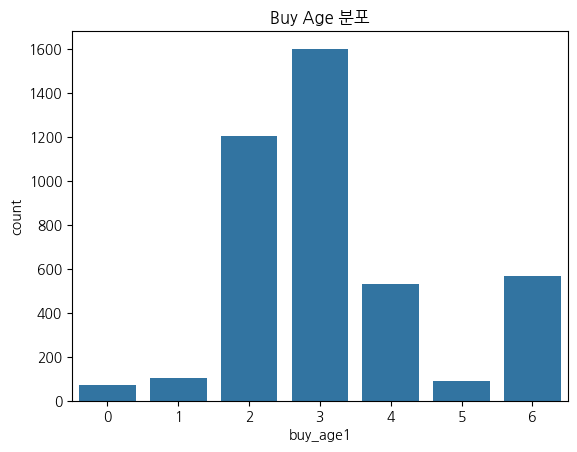

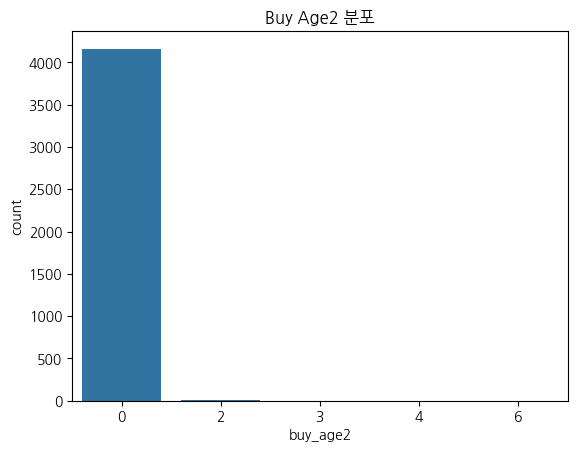

In [ ]:
sns.countplot(x='buy_age1', data=df)
plt.title('Buy Age 분포')

plt.show()
sns.countplot(x='buy_age2', data=df)
plt.title('Buy Age2 분포')

plt.show()

buy_age2는 의미 없음을 확인하여 후에 제거를 진행

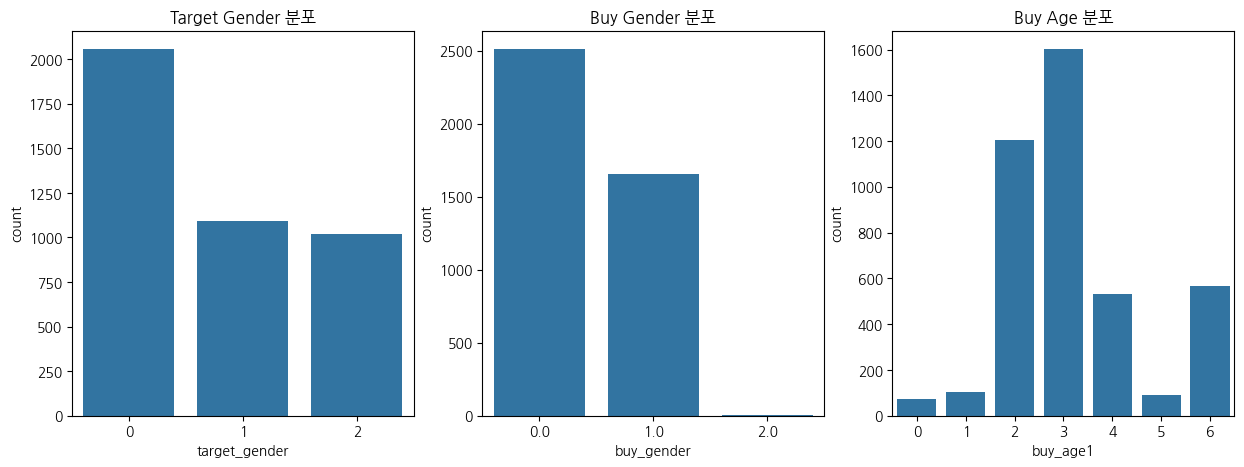

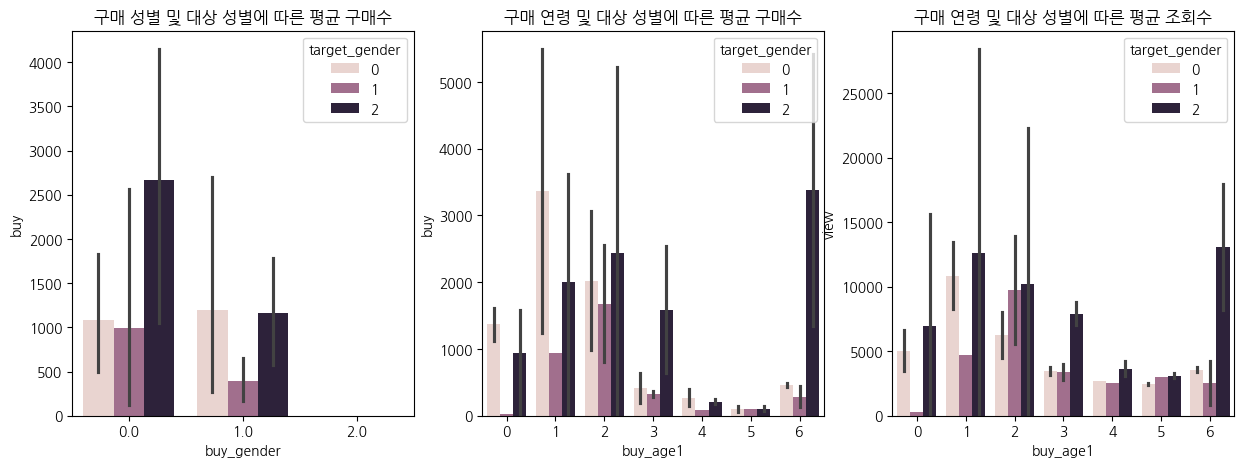

In [ ]:
# 카테고리 변수들의 분포 확인
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='target_gender', data=df)
plt.title('Target Gender 분포')

plt.subplot(1, 3, 2)
sns.countplot(x='buy_gender', data=df)
plt.title('Buy Gender 분포')

plt.subplot(1, 3, 3)
sns.countplot(x='buy_age1', data=df)
plt.title('Buy Age 분포')

plt.show()

# 각 카테고리에 따른 구매율, 조회수, 좋아요 등의 평균값 확인
grouped_data = df.groupby(['target_gender', 'buy_gender', 'buy_age1']).agg({
    'buy': 'mean',
    'view': 'mean',
    'like': 'mean'
}).reset_index()

# 시각화
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='buy_gender', y='buy', hue='target_gender', data=grouped_data)
plt.title('구매 성별 및 대상 성별에 따른 평균 구매수')

plt.subplot(1, 3, 2)
sns.barplot(x='buy_age1', y='buy', hue='target_gender', data=grouped_data)
plt.title('구매 연령 및 대상 성별에 따른 평균 구매수')

plt.subplot(1, 3, 3)
sns.barplot(x='buy_age1', y='view', hue='target_gender', data=grouped_data)
plt.title('구매 연령 및 대상 성별에 따른 평균 조회수')

plt.show()





(상의, 하의, 아우터 기준)

상품에 대한 그래프
1번 그래프
- 남성을 타겟으로 한 제품이 많음

2번 그래프
- 남성이 더 선호하는 제품이 여성이 더 선호하는 제품보다 많다.

3번 그래프
- 19세-28세 사이에 고객층에서 인기 있는 제품이 많음
- 40대 이상의 경우 미성년 고객이 부모님의 아이디를 사용했을 가능성이 존재
- 이 쇼핑몰의 제품들의 매력도가 20대 후반부터는 잘 어필할 수 없음
-------------
1년간 구매 수량에 대한 그래프

4번째 그래프
- 여성도 여성 겨냥 제품보다 남자 혹은 공용제품을 더 많이 구매함
- 남성은 남성 제품보다 공용 제품을 더 많이 구매함
- 남성이 여성 제품을 구매한 경우도 적지 않음
- 남, 여가 각자 많이 구매한 제품 중에는 남자/여자를 각 겨냥한 상품보다 남녀공용 상품이 비슷하거나 많았다.


5번째 그래프
- 20대 이상의 모든 연령층에서 공용 제품 판매량이 가장 많다.
- 10대에서는 남성 타겟 제품이 가장 많다
- 여성 타겟 제품은 비교적  판매량이 떨어진다.

6번쨰 그래프
- 여성들의 경우 조회를 더 많이 하는 것에 비해 구매 전환이 떨어지는 편이다
- 남성의 경우 조회수 대비 구매 전환율이 더 잘 된다.
- 구매량과 조회수는 비례한다.

## 누적판매량과 수치형 컬럼간의 선형 관계 확인

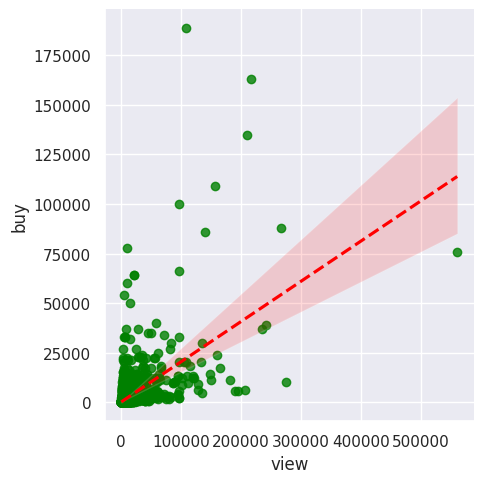

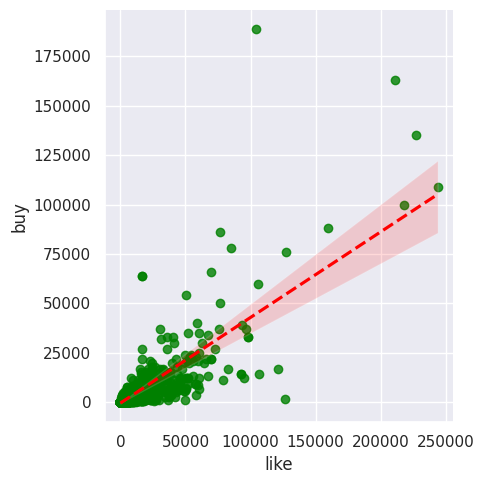

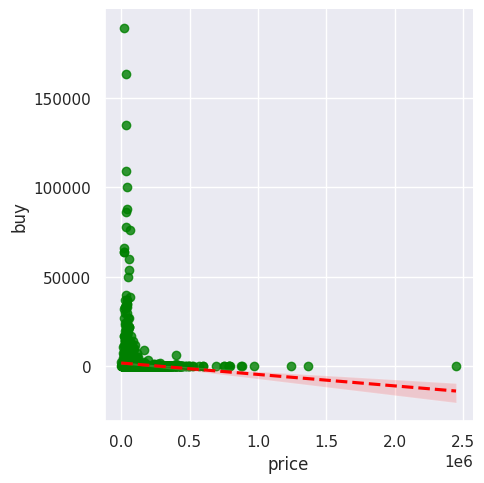

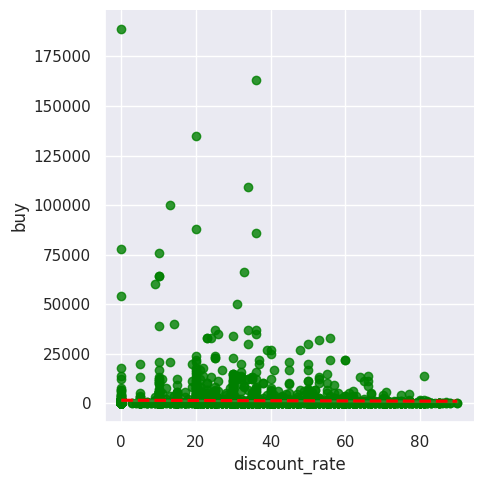

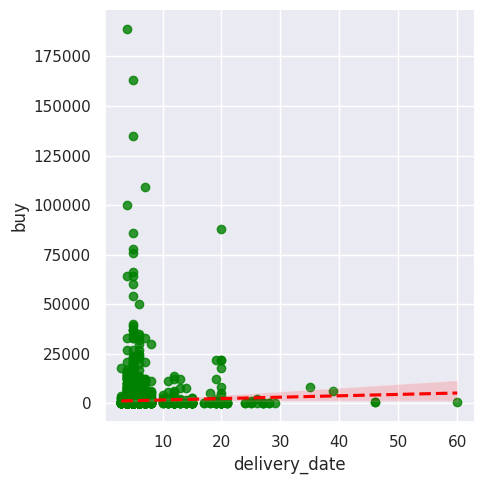

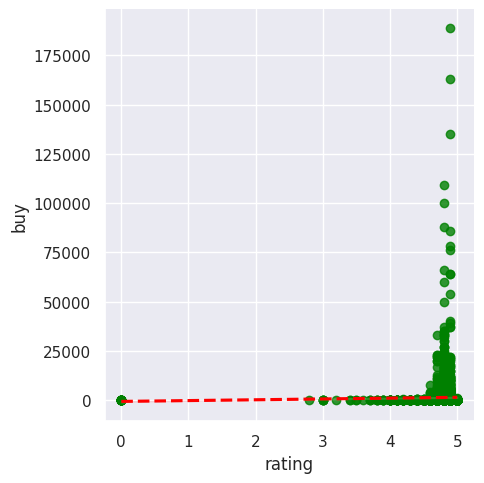

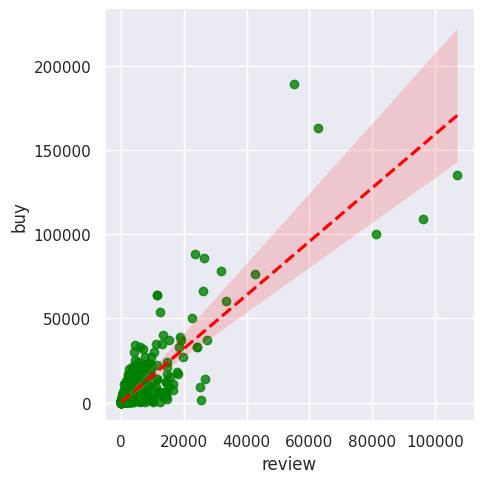

In [ ]:
sns.lmplot(x='view', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='like', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='price', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='discount_rate', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='delivery_date', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='rating', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})
sns.lmplot(x='review', y='buy', data=df,
           line_kws={'color':'red','linestyle':'--' },
           scatter_kws={'color':'green'})


In [ ]:
# 이상치 발견해서 수정
df.loc[df.review == 81354, 'buy'] = 100000

In [ ]:
df.loc[17, 'buy']

41000.0

In [ ]:
# 이상치 제거(제품 사이트 하자)
df = df.drop([17, 2144, 3398], axis=0)

- view, like은 양의 상관관계
- price는 음의 방향이나 영향이 거의 없음
- discount_rate는 영향이 거의 없음 오차 범위가 넓은 편(모델링에서삭제 요망)
- delivery_date는 생각보다 영향이 없었으나 현상만으로 봤을 떄는 판매가 많이
- 일어나는 제품들의 경우 배송일이 10일 이내인 제품들이 많다.
- rating의 경우 평점이 낮은 제품들이 구매가 적은 경향이 있다.